# Problem Statement

You work in an event management company. On Mother's Day, your company has organized an event where they want to cast positive Mother's Day related tweets in a presentation. Data engineers have already collected the data related to Mother's Day that must be categorized into positive, negative, and neutral tweets.

You are appointed as a Machine Learning Engineer for this project. Your task is to build a model that helps the company classify these sentiments of the tweets into positive, negative, and neutral.

In [1]:
import re
import nltk
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
test1 = pd.read_csv('test.csv')

In [3]:
train.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [4]:
train = train[['original_text', 'sentiment_class']]
test = test[['original_text']]

In [5]:
train['sentiment_class'].value_counts()

 0    1701
-1     769
 1     765
Name: sentiment_class, dtype: int64

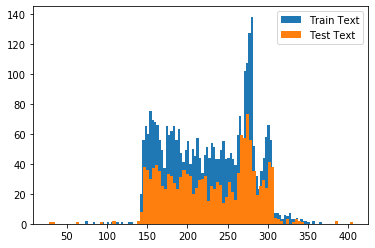

In [6]:
str_len_test = test[test['original_text'].str.len() < 700]['original_text'].str.len()
str_len_train = train[train['original_text'].str.len() < 700]['original_text'].str.len()

plt.hist(str_len_train, bins=100, label="Train Text")
plt.hist(str_len_test, bins=100, label="Test Text")
plt.legend()
plt.show()

In [7]:
def clean_summary(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z#]"," ",text)
    text = re.sub("http\S+|www.\S+","", text)
    text = re.sub("igshid","", text)
    text = re.sub("instagram","", text)
    text = re.sub("twitter","", text)
    text = re.sub("mothersday","", text)
    text = re.sub("happymothersday","", text)
    text = re.sub("motheringsubday","", text)
    text = re.sub("happy","", text)
    text = ' '.join(text.split())
    text = text.lower()
    text = ' '.join([w for w in text.split() if len(w)>3])
    words = text.split()
    text = " ".join(sorted(set(words), key=words.index))
    return text

In [8]:
train['clean_text'] = train['original_text'].apply(lambda x: clean_summary(x))
train.head(2)

,original_text,sentiment_class,clean_text
0,Happy #MothersDay to all you amazing mothers o...,0,happy #mothersday amazing mothers there know h...
1,Happy Mothers Day Mum - I'm sorry I can't be t...,0,happy mothers sorry cant there bring flowers c...


In [9]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

nltk.download('words')
words = set(nltk.corpus.words.words())

def remove_nonenglish(text):
    return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    
train['clean_text'] = train['clean_text'].apply(lambda x: remove_stopwords(x))

train.head()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hungu\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,original_text,sentiment_class,clean_text
0,Happy #MothersDay to all you amazing mothers o...,0,happy #mothersday amazing mothers know hard ab...
1,Happy Mothers Day Mum - I'm sorry I can't be t...,0,happy mothers sorry cant bring flowers cwtch h...
2,Happy mothers day To all This doing a mothers ...,-1,happy mothers days work today quiet time refle...
3,Happy mothers day to this beautiful woman...ro...,0,happy mothers beautiful woman royalty soothes ...
4,Remembering the 3 most amazing ladies who made...,-1,remembering amazing ladies made late grandmoth...


In [10]:
test['clean_text'] = test['original_text'].apply(lambda x: clean_summary(x))
test['clean_text'] = test['clean_text'].apply(lambda x: remove_stopwords(x))
test.head()

,original_text,clean_text
0,"3. Yeah, I once cooked potatoes when I was 3 y...",yeah cooked potatoes years mean threw spuds to...
1,"Happy Mother's Day to all the mums, step-mums,...",happy mothers mums step grandmothers dads cove...
2,"I love the people from the UK, however, when I...",love people however awoke #mothersday trending...
3,Happy 81st Birthday Happy Mother’s Day to my m...,happy birthday mother today keep safe shame ma...
4,Happy Mothers day to all those wonderful mothe...,happy mothers wonderful world live present alw...


In [11]:
combine = train.append(test)

C:\Users\hungu\anaconda.x\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [12]:
from wordcloud import WordCloud

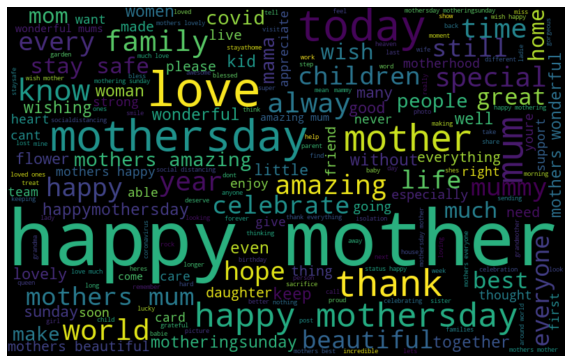

In [13]:
all_words = ' '.join([text for text in combine['clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

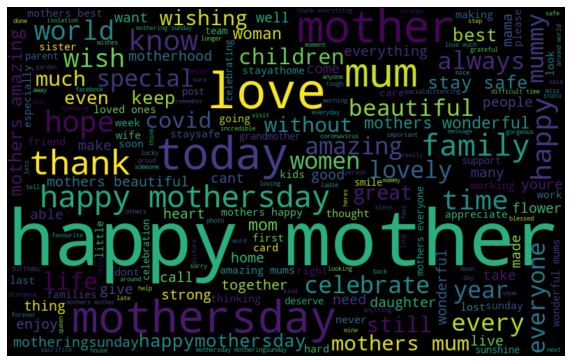

In [14]:
not_sarcastic =' '.join([text for text in combine['clean_text'][combine['sentiment_class'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(not_sarcastic)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

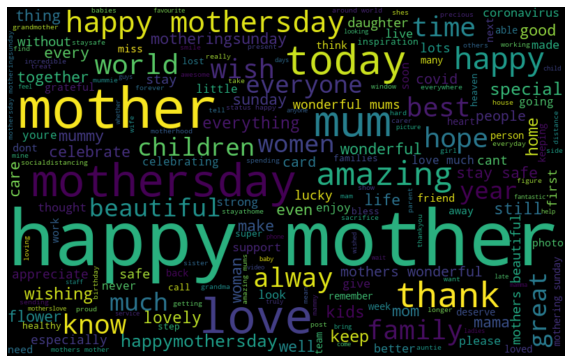

In [15]:
not_sarcastic =' '.join([text for text in combine['clean_text'][combine['sentiment_class'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(not_sarcastic)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

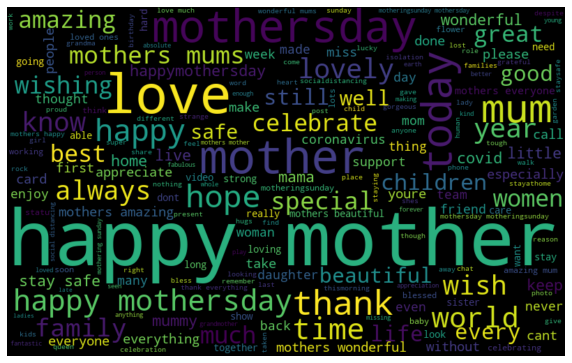

In [16]:
not_sarcastic =' '.join([text for text in combine['clean_text'][combine['sentiment_class'] == -1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(not_sarcastic)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [18]:
HT_positive = hashtag_extract(combine['clean_text'][combine['sentiment_class'] == 0])
HT_negative = hashtag_extract(combine['clean_text'][combine['sentiment_class'] == 1])
HT_neutral = hashtag_extract(combine['clean_text'][combine['sentiment_class'] == -1])

In [19]:
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])

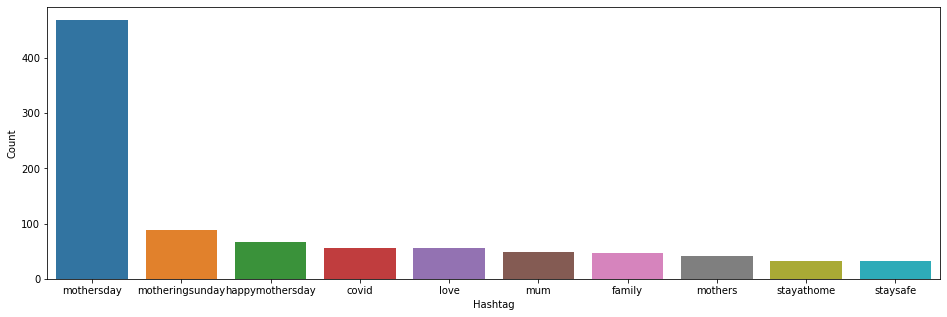

In [20]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

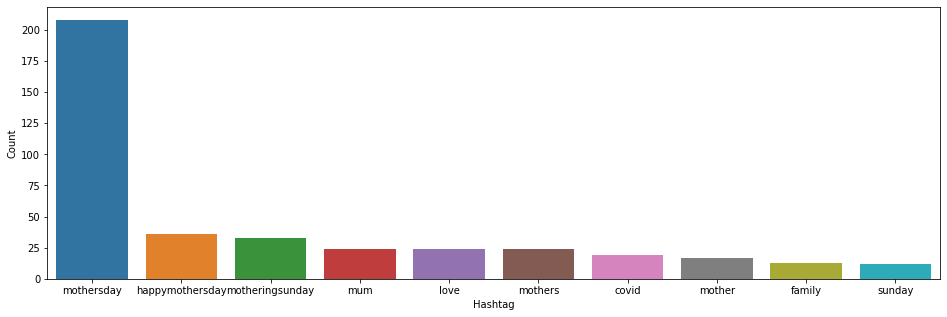

In [21]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

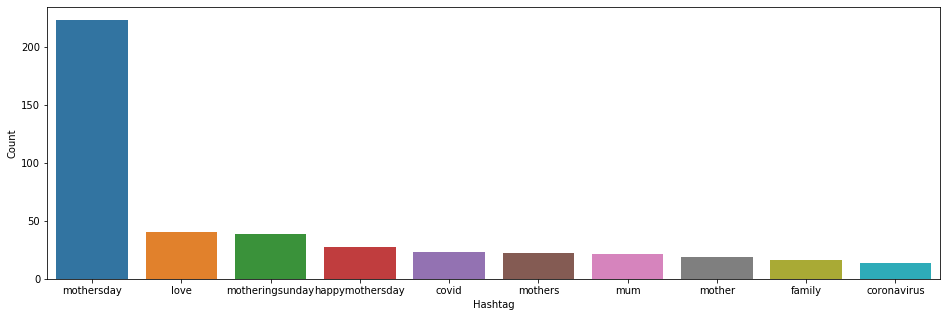

In [22]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [23]:
def clean_summary_modelling(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = re.sub("http\S+|www.\S+","", text)
    text = re.sub("igshid","", text)
    text = re.sub("instagram","", text)
    text = re.sub("twitter","", text)
    text = re.sub("mothersday","", text)
    text = re.sub("happymothersday","", text)
    text = re.sub("motheringsubday","", text)
    text = ' '.join(text.split())
    text = text.lower()
    text = ' '.join([w for w in text.split() if len(w)>3])
    words = text.split()
    text = " ".join(sorted(set(words), key=words.index))
    return text

In [24]:
train['clean_text'] = train['original_text'].apply(lambda x: clean_summary_modelling(x))
train['clean_text'] = train['clean_text'].apply(lambda x: remove_stopwords(x))
train['clean_text'] = train['clean_text'].apply(lambda x: remove_nonenglish(x))

train.head()

,original_text,sentiment_class,clean_text
0,Happy #MothersDay to all you amazing mothers o...,0,happy amazing know hard able today protect vul...
1,Happy Mothers Day Mum - I'm sorry I can't be t...,0,happy sorry cant bring honestly point walk abl...
2,Happy mothers day To all This doing a mothers ...,-1,happy days work today quiet time reflect walk ...
3,Happy mothers day to this beautiful woman...ro...,0,happy beautiful woman royalty mummy emerald
4,Remembering the 3 most amazing ladies who made...,-1,amazing ladies made late grandmother iris caro...


In [25]:
test['clean_text'] = test['original_text'].apply(lambda x: clean_summary_modelling(x))
test['clean_text'] = test['clean_text'].apply(lambda x: remove_stopwords(x))
test['clean_text'] = test['clean_text'].apply(lambda x: remove_nonenglish(x))
test.head()

,original_text,clean_text
0,"3. Yeah, I once cooked potatoes when I was 3 y...",yeah potatoes mean threw toilet happy made bre...
1,"Happy Mother's Day to all the mums, step-mums,...",happy step cover parental
2,"I love the people from the UK, however, when I...",love people however awoke woke immediately hap...
3,Happy 81st Birthday Happy Mother’s Day to my m...,happy birthday mother today keep safe shame ma...
4,Happy Mothers day to all those wonderful mothe...,happy wonderful world live present always rely...


In [26]:
X = train.drop(['sentiment_class','original_text'], axis=1)
y = train['sentiment_class']

X_test = test.drop(['original_text'], axis=1)
X.shape, y.shape, X_test.shape

((3235, 1), (3235,), (1387, 1))

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [28]:
xtrain, xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=10)

In [29]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.46, min_df=1, max_features=3000)
x_train = tfidf_vectorizer.fit_transform(xtrain['clean_text'])
x_val = tfidf_vectorizer.transform(xval['clean_text'])

In [30]:
classifier = LogisticRegression()

classifier.fit(x_train, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
pred = classifier.predict(x_val)
100 * f1_score(yval, pred, average='weighted'), accuracy_score(yval, pred)

(39.43118634594913, 0.4899536321483771)

In [32]:
confusion_matrix(yval, pred)

array([[ 11, 131,   8],
       [ 19, 297,  25],
       [ 10, 137,   9]], dtype=int64)

In [33]:
test_x = tfidf_vectorizer.transform(X_test['clean_text'])
pred_test = classifier.predict(test_x)

In [34]:
submission = pd.DataFrame()
submission['id'] = test1['id']
submission['sentiment_class'] = pred_test
submission['sentiment_class'].value_counts()

 0    1187
-1     111
 1      89
Name: sentiment_class, dtype: int64

In [35]:
submission.to_csv('Submission.csv', index=False)